# TPC2 -  Sistemas de Equações

<ul>
    <li>Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. </li>
    <li>Deve entregar ESTE Notebook de Jupyter.</li>
    <li>O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. </li>
    <li>Não deve acrescentar ou apagar nenhuma célula. </li>
    <li>Todas as explicações devem ser claras e concisas. </li>
    <li>É preferível fazer menos e fazer bem que muito e mal. </li>
    <li>O método @jit(nopython=True) do pacote numba pode diminuir o tempo de cálculo.</li>
    <li>A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.</li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import random

# Sistema de massas livre
Considere um sistema de $N$ massas acopladas entre si e a duas paredes
fixas com $N+1$ molas:

\begin{equation}
m\frac{d^{2}X_{i}}{dt^{2}}=-k_{i}\left(X_{i}-X_{i-1}\right)+k_{i+1}\left(X_{i+1}-X_{i}\right)
\end{equation}
onde $X_{0}=0$ e $X_{N+1}=L$. Podemos usar como unidades de comprimento
a distância entre as paredes, a massa $m$ e como unidade de tempo
\begin{equation}
\tau=\sqrt{\frac{m}{\overline{k}}}
\end{equation}
onde $\overline{k}$ a constante média das molas.

1. Escreva uma rotina que resolva um sistema de equações usando uma eliminação
de Gauss com pivotagem parcial.

Para adimensionalizar a equação do sistema de massas acopladas, podemos utilizar as seguintes transformações de variáveis:

\begin{align*}
t' &= t\tau \\
x_i' &= \frac{X_i}{L} \\
k_i' &= \frac{k_i}{\overline{k}}
\end{align*}

Substituindo essas transformações na equação original, temos:

$$
m\left(\frac{d^2}{dt^2}\right)\left(Lx_i'\tau^2\right) = -k_i'\left(x_i' - x_{i-1}'\right) + k_{i+1}'\left(x_{i+1}' - x_i'\right)
$$

Simplificando a equação e cancelando as constantes, obtemos:

$$
\frac{d^2x_i'}{dt'^2} = -k_i'\left(x_i' - x_{i-1}'\right) + k_{i+1}'\left(x_{i+1}' - x_i'\right)
$$

Agora, a equação adimensionalizada para o sistema de massas acopladas é:

$$
\frac{d^2x_i'}{dt'^2} = -k_i'\left(x_i' - x_{i-1}'\right) + k_{i+1}'\left(x_{i+1}' - x_i'\right)
$$

onde $x_i'$ é a posição adimensional da massa $i$, $t'$ é o tempo adimensional, $k_i'$ é a constante adimensional da mola $i$.




In [2]:
def solveGaussJordanPivotagemParcial(A,b):
    M=len(b)
    linhas = np.arange(M)
    AA =np.zeros([M, M+1])
    AA[:M, :M]= A
    AA[:,M]=b
    
    for p in range(M):
        index = p + np.argmax(np.abs(AA[linhas[p:], p]))
        linhas[p], linhas[index] = linhas[index], linhas[p]
        
        AA[linhas[p], :] /= AA[linhas[p],p]
        
        for i in range(p):
            AA[linhas[i],p:] -= AA[linhas[p],p:] * AA[linhas[i], p]
            
        for i in range(p+1, M):
            AA[linhas[i],p:] -= AA[linhas[p],p:] * AA[linhas[i], p]
    return AA[linhas[:],-1]

2. Considerando massas iguais e molas iguais,

    (a) Em que condições o sistema está em equilíbrio? Resolva o correspondente sistema de equações e obtenha as posições de equilíbrio ($X_{i}^{eq}$).

Para determinar as condições de equilíbrio do sistema, vamos considerar que as posições $X_i$ das massas estão em equilíbrio, ou seja, não variam no tempo. Isso implica que as acelerações são nulas.

Podemos reescrever a equação de movimento para cada massa $i$ em termos das posições de equilíbrio $X_i^{eq}$:

$0 = -k_i(X_i^{eq} - X_{i-1}^{eq}) + k_{i+1}(X_{i+1}^{eq} - X_i^{eq})$

Isso dá-nos a seguinte condição de equilíbrio:

$k_i(X_{i-1}^{eq} - X_i^{eq}) + k_{i+1}(X_i^{eq} - X_{i+1}^{eq}) = 0$

Essa condição de equilíbrio relaciona as posições das massas adjacentes. Podemos interpretá-la da seguinte forma:

   A soma das forças nas molas à esquerda da massa $i$ deve ser igual à soma das forças nas molas à direita da massa $i$ para que o sistema esteja em equilíbrio.

Agora, vamos resolver o sistema de equações para obter as posições de equilíbrio $X_i^{eq}$. Vamos considerar massas iguais e molas iguais, ou seja, $m_i = m$ e $k_i = k$ para todo $i$.

Podemos usar o sistema de equações obtido acima para encontrar as posições de equilíbrio. Podemos escrever o sistema na forma matricial:

$\begin{bmatrix}
2k & -k & 0 & 0 & \ldots & 0 \
-k & 2k & -k & 0 & \ldots & 0 \
0 & -k & 2k & -k & \ldots & 0 \
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \
0 & \ldots & 0 & -k & 2k & -k \
0 & \ldots & 0 & 0 & -k & 2k
\end{bmatrix}
\begin{bmatrix}
X_1^{eq} \
X_2^{eq} \
X_3^{eq} \
\vdots \
X_{N-1}^{eq} \
X_N^{eq}
\end{bmatrix}
= \begin{bmatrix}
0 \
0 \
0 \
\vdots \
0 \
L
\end{bmatrix}$

Podemos resolver esse sistema de equações lineares para obter as posições de equilíbrio $X_i^{eq}$. A matriz dos coeficientes é uma matriz tridiagonal simétrica com diagonal principal igual a $2k$ e as diagonais acima e abaixo da diagonal principal igual a $-k$. O vetor do lado direito é um vetor com todos os elementos iguais a zero, exceto o último elemento que é igual a $L$.

In [3]:
def find_equilibrium_positions(N, k, L):
    # Ccriação da matriz descrito acima que denotaremos como A
    A = np.zeros((N, N))
    np.fill_diagonal(A, 2*k)
    np.fill_diagonal(A[1:], -k)
    np.fill_diagonal(A[:, 1:], -k)

    # Create the right-hand side vector b
    b = np.zeros(N)
    b[-1] = L

    # Resolução sistema código pergunta 1 Ax = b
    X_eq = solveGaussJordanPivotagemParcial(A,b)

    return X_eq
# Exemplo 
N = 10
k = 1.0
L = 1

X_eq = find_equilibrium_positions(N, k, L)

print("Equilibrium Positions:")
for i, x in enumerate(X_eq):
    print(f"X_{i+1}^eq = {x}")

Equilibrium Positions:
X_1^eq = 0.09090909090909088
X_2^eq = 0.18181818181818177
X_3^eq = 0.27272727272727265
X_4^eq = 0.36363636363636365
X_5^eq = 0.45454545454545453
X_6^eq = 0.5454545454545453
X_7^eq = 0.6363636363636362
X_8^eq = 0.7272727272727271
X_9^eq = 0.8181818181818181
X_10^eq = 0.9090909090909091


(b) Verifique que no equilíbrio as distâncias entre massas são sempre iguais e iguais a $1/(N+1)$.

No equilíbrio, o sistema está em um estado de repouso, o que significa que todas as forças e acelerações estão equilibradas. Vamos considerar a condição de equilíbrio para duas massas adjacentes, $i$ e $i+1$:

$k_i(X_{i-1}^{eq} - X_i^{eq}) + k_{i+1}(X_i^{eq} - X_{i+1}^{eq}) = 0$

Como temos massas iguais e constantes de mola iguais, podemos simplificar a equação para:

$(X_{i-1}^{eq} - X_i^{eq}) + (X_i^{eq} - X_{i+1}^{eq}) = 0$

Rearranjando os termos:

$X_{i-1}^{eq} - 2X_i^{eq} + X_{i+1}^{eq} = 0$

Essa equação representa a condição de equilíbrio para as massas $i-1$, $i$ e $i+1$. Observe que ela se assemelha à aproximação de diferenças finitas para a segunda derivada de $X$ em relação à posição, $X''(i)$:

$X''(i) = X_{i-1} - 2X_i + X_{i+1}$

Na condição de equilíbrio, essa segunda derivada é igual a zero. Isso implica que, no equilíbrio, as posições das massas formam um oscilador harmônico discreto, onde cada massa está em um mínimo ou máximo de sua oscilação.

Em um oscilador harmônico discreto, as posições de equilíbrio são determinadas pelo comprimento de onda ou periodicidade da oscilação. A distância entre posições de equilíbrio adjacentes corresponde a uma oscilação completa ou período da oscilação.

Como o sistema possui $N+1$ posições de equilíbrio (incluindo as paredes), a distância total entre as paredes é dividida em $N+1$ segmentos iguais. Portanto, a distância entre posições de equilíbrio adjacentes é $\frac{L}{N+1}$.

Portanto, no equilíbrio, a distância entre as massas é igual a $\frac{L}{N+1}$. No caso adimensional tratado é igual a $\frac{1}{N+1}$.

In [4]:
N = 10
k = 1.0
L = 1.0
x_eq = find_equilibrium_positions(N, k, L)
def verify_distances(N, X_eq,L):
    distance = X_eq[1:] - X_eq[:-1]
    expected_distance = L / (N+1)

    # Check if all distances are equal and equal to expected_distance
    if np.allclose(distance, expected_distance):
        print("At equilibrium, the distances between masses are equal and equal to L/(N+1).")
        print(np.diff(x_eq))
        print("L/(N+1): ",expected_distance )
    else:
        print("The distances between masses are not equal at equilibrium.")
        print("Equilibrium Positions:")

verify_distances(N, X_eq,L)

At equilibrium, the distances between masses are equal and equal to L/(N+1).
[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909]
L/(N+1):  0.09090909090909091


3. Gere aleatoriamente valores de $k_{i}$ usando uma distribuição gaussiana
de largura $\sigma=0.1$ e valor médio $\mu=1$. Faça um histograma
das diferenças entre as posições de equilíbrio de massas consecutivas
para um sistema com $N=2^{10}$.

Considerando, novamente, o conjunto de equações discutido na alínea 2. obtemos, neste caso, para $k_{i}$ aleatório e diferente para cada $i$ o seguinte sistema de equações:
$$\displaystyle \begin{bmatrix} 
k_1 + k_2 & -k_2 & 0 & \dots & 0 \\
-k_2 & k_2 + k_3 & -k_3 & \dots & 0 \\
0 & -k_3 & k_3 + k_4 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & k_{N-1} + k_N
\end{bmatrix}\begin{bmatrix} 
x_{1} \\
x_{2} \\
x_{3} \\
\vdots  \\
x_{N}
\end{bmatrix}= \begin{bmatrix} 
0 \\
0 \\
0 \\
\vdots  \\
-k_{N+1}L
\end{bmatrix}$$
Utilizando a rotina apresentada na primeira alínea para resolução de sistema de equações e a funcionalidade diff que retorna as diferenças entre elementos consecutivos de um dado array podemos fazer plot de modo a apresentar o histograma pretendido a partir do conjunto de $k_{i}$ obtido através da funcionalidade random.

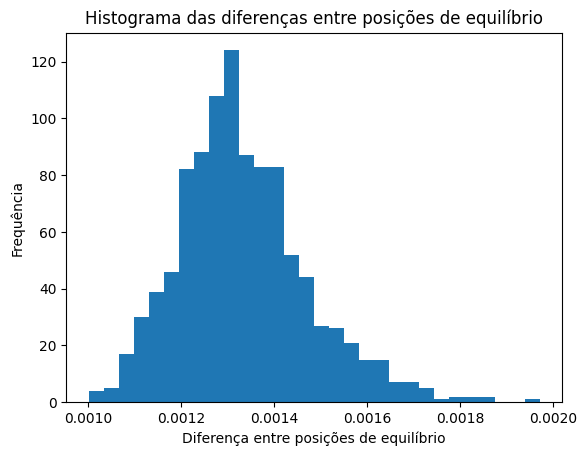

In [5]:
N = 2**10
sigma = 0.1
mu = 1.0
L  = 1.0
# Geração aleatória de ki
k_values = np.random.normal(loc=mu, scale=sigma, size=N+1)

# Construção do sistema de equações
A = np.zeros((N, N))
b = np.zeros(N)
b[N-1]= k_values[N-1]*L
for i in range(N):
    A[i, i] = (k_values[i] + k_values[i+1])
    if i > 0:
        A[i, i-1] = -k_values[i]
    if i < N-1:
        A[i, i+1] =- k_values[i+1]

# Resolução do sistema de equações
positions = solveGaussJordanPivotagemParcial(A, b)
# Cálculo das diferenças entre as posições de equilíbrio consecutivas
differences = np.diff(positions)
# Histograma das diferenças
plt.hist(differences, bins=30)
plt.xlabel('Diferença entre posições de equilíbrio')
plt.ylabel('Frequência')
plt.title('Histograma das diferenças entre posições de equilíbrio')
plt.show()

4. Fazendo a mudança de variável, $x_{i}=X_{i}-X_{i}^{eq}$ podemos transformar
o sistema de equações diferenciais em,
\begin{equation}
\frac{d^{2}x_{i}}{dt^{2}}=A_{ij}x_{j}\qquad\text{com }1\le i\le N
\end{equation}
onde é usada a convenção de índices repetidos e a matriz $A$ é simétrica
e tridiagonal.

(a) Note que sabendo os valores próprios do sistema de $A$, $\lambda_{\beta}$, e os respectivos vectores próprios $v_{i}^{\beta}$ (devidamente normalizados $\sum_{i}v_{i}^{\beta}v_{i}^{\alpha}=\delta_{\alpha\beta}$), podemos construir um novo conjunto de variáveis,\begin{equation}f_{\beta}=U_{\beta i}^{T}x_{i} \end{equation} onde $U$ é uma matriz ortogonal com os vectores próprios, $v_{i}^{\beta},$em cada coluna e $U^{T}$ é a sua transposta ($U_{j\alpha}U_{\alpha i}=\delta_{ji}$).
Note-se ainda, que 
\begin{equation}
\sum_{i,j}U_{\beta i}^{T}A_{ij}U_{j\alpha}=D_{\alpha\beta}
\end{equation}
onde $D$ é a matriz diagonal com os valores, $D_{\alpha\alpha}=\lambda_{\alpha}$.
Fazendo a mudança de coordenadas associada a esta transformação ortogonal,
obtemos o seguinte sistema equivalente
\begin{align*}
\frac{d^{2}f_{\beta}}{dt^{2}} & =D_{\beta\alpha}f_{\alpha}.
\end{align*}
Como $D$ é diagonal as equações desacoplam, i.e.
\begin{equation}
\frac{d^{2}f_{\beta}}{dt^{2}}=\lambda_{\beta}f_{\beta},
\end{equation}
que admitem soluções da forma
\begin{equation}
f_{\beta}=A_{\beta}e^{t\sqrt{\lambda_{\beta}}}+B_{\beta}e^{-t\sqrt{\lambda_{\beta}}}
\end{equation}
Logo a diagonalização da matriz $A$ permite a solução do sistema
de equações no tempo. Utilize a decomposição $QR$ para obter, quer
os valores próprios, quer os vectores próprios de uma matriz com $k_{i}$
aleatórios como descrito anteriormente ( $N=10$).

Para o exercício discutido decidimos utilizar o método de Gram-Schmhit para o cálculo da decomposição QR da matriz inicial.

In [6]:
N = 10  # número de massas
sigma = 0.1  # largura da distribuição gaussiana
mu = 1  # valor médio

k_values = np.random.normal(loc=mu, scale=sigma, size=N+1)  # gera valores de k_i

A = np.zeros((N, N))  # matriz A

for i in range(N):
    A[i, i] = k_values[i] + k_values[i+1]  # diagonal principal
    if i > 0:
        A[i, i-1] = -k_values[i]  # termos abaixo da diagonal
    if i < N-1:
        A[i, i+1] = -k_values[i+1]  # termos acima da diagonal
def gramschmidt(A):
    N=len(A)
    Q = np.zeros([N,N],float)
    R = np.zeros([N,N],float)
    for i in range(N):
        v = A[:,i] - np.dot( Q[:,:i], np.dot ( A[:,i], Q[:,:i]) )
        vv = np.linalg.norm(v)
        Q[:,i] = v / vv
        R[i,i:] = np.dot(Q[:,i], A[:,i:])
    return Q,R
def QR_eigvals(A, N, tol=1e-6, maxiter=1000):
    A_old = np.copy(A)
    A_new = np.copy(A)
    V = np.identity(len(A[0]))
    diff = np.inf
    i = 0
    while (diff > tol) and (i < maxiter):
        A_old[:, :] = A_new
        Q, R = gramschmidt(A_old)
        V = Q @ V
        A_new[:, :] = R @ Q

        diff = np.abs(A_new - A_old).max()
        i += 1

    eigvals = np.diag(A_new)

    if N == 0:
        return eigvals
    else:
        return V
print("Valores próprios:",QR_eigvals(A,0))
print("Vetores próprios:",QR_eigvals(A,1))

Valores próprios: [3.98090267 3.8729643  3.24467549 2.81407891 2.33389406 1.72669328
 1.22835777 0.71309939 0.31362835 0.08460306]
Vetores próprios: [[ 4.74061587e-02  8.59925847e-02  1.48265955e-01  2.21943847e-01
   2.57678431e-01  2.33042632e-01 -9.41949855e-02 -5.95554979e-01
  -1.60994540e-01  6.39477407e-01]
 [-1.43868945e-01 -2.05710055e-01 -2.81775155e-01 -2.58014614e-01
  -2.19128220e-01 -1.94545696e-01 -3.43117501e-01 -5.76083266e-01
  -3.82194114e-01 -3.30873429e-01]
 [ 3.47391726e-01  3.61600404e-01  3.34989529e-01  2.86194341e-01
   2.32243858e-01  1.92554142e-01  1.23770857e-02 -1.51730313e-01
  -2.45499610e-01 -6.16424615e-01]
 [-6.62005996e-01 -3.64279559e-01 -3.00112704e-02  1.81889653e-01
   3.44769163e-01  4.13624706e-01  2.18881584e-01  6.36066914e-03
  -7.24543672e-02 -2.27845402e-01]
 [ 5.48394288e-01 -2.49996970e-01 -5.01459543e-01 -2.82677278e-01
   1.66360111e-01  4.53960740e-01  2.64338345e-01 -1.91289381e-02
  -3.51435873e-02 -1.28574543e-02]
 [-3.30824706e-0

(b) Sabendo a forma das equações próprias do sistema, a evolução temporal
nas coordenadas $x_{i}(t)$ é dada por 
\begin{equation}
x_{i}=U_{i\beta}A_{\beta}e^{t\sqrt{\lambda_{\beta}}}+U_{i\beta}B_{\beta}e^{-t\sqrt{\lambda_{\beta}}}
\end{equation}
Logo para determinar a evolução temporal, apenas falta definir as
contantes $A_{\beta}$ e $B_{\beta}$ a partir das condições iniciais.
Tome como condição inicial as velocidades nulas e as posições aleatórias
com $x\in]-1/(N+1),1/(N+1)[$. Obtenha as constantes $A_{\beta}$
e $B_{\beta}$.

Das condições acima mencionadas obtemos os seguintes sistemas de equações 
$$x_{i}(0)= U_{i\beta}(A_{\beta}+B_{\beta})$$
$$U_{i\beta}(A_{\beta}-B_{\beta})=0$$
mas, tendo em conta que a matriz, $U_{i\beta}$, se trata da matriz ortogonal na qual todos os vetores próprios são linearmente independentes, então a segunda equação tem como solução $A_{beta}=B_{beta}$ e como tal a determinação das constantes trata-se apenas por resolver o primeiro sistema de equações e dividir a sua solução por dois.

In [7]:
import random

N = 10  # Example value of N
sigma = 0.1  # largura da distribuição gaussiana
mu = 1  # valor médio

k_values = np.random.normal(loc=mu, scale=sigma, size=N+1)  # gera valores de k_i

A = np.zeros((N, N))  # matriz A

for i in range(N):
    A[i, i] = k_values[i] + k_values[i+1]  # diagonal principal
    if i > 0:
        A[i, i-1] = -k_values[i]  # termos abaixo da diagonal
    if i < N-1:
        A[i, i+1] = -k_values[i+1]  # termos acima da diagonal
x_0 = [random.uniform(-1/(N+1), 1/(N+1)) for i in range(N)]

C = solveGaussJordanPivotagemParcial(QR_eigvals(A,1),x_0)
A_beta = C/2
B_beta = C/2

print("A_beta=B_beta: ", A_beta)

A_beta=B_beta:  [-0.00927926 -0.04196043 -0.05079876  0.00741043  0.00828957 -0.03439084
 -0.01900199 -0.00872696 -0.03071904  0.03413883]


(c) Represente no tempo a posição de cada uma das massas a partir das condições iniciais da alínea anterior.

Comportamento das várias componentes do sistema dependerá das especificidades do sistema.

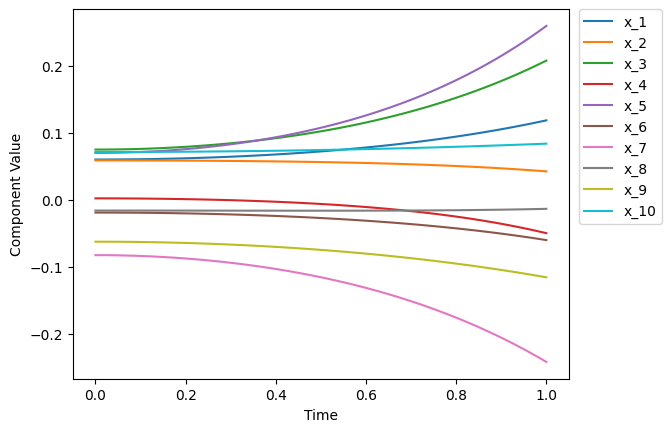

In [8]:
N = 10  # Example value of N
sigma = 0.1  # largura da distribuição gaussiana
mu = 1  # valor médio

k_values = np.random.normal(loc=mu, scale=sigma, size=N+1)  # gera valores de k_i

A = np.zeros((N, N))  # matriz A

for i in range(N):
    A[i, i] = k_values[i] + k_values[i+1]  # diagonal principal
    if i > 0:
        A[i, i-1] = -k_values[i]  # termos abaixo da diagonal
    if i < N-1:
        A[i, i+1] = -k_values[i+1]  # termos acima da diagonal
x_0 = [random.uniform(-1/(N+1), 1/(N+1)) for i in range(N)]

C = solveGaussJordanPivotagemParcial(QR_eigvals(A,1),x_0)
A_beta = C/2
B_beta = C/2
def x_t_i(eigenvals, eigenvecs, A_beta, B_beta, t):
    return np.dot(eigenvecs, A_beta*(np.exp(t * np.sqrt(eigenvals)) + np.exp(-t * np.sqrt(eigenvals))))
t_values = np.linspace(0, 1,100)
# Calculate x_t for each time value
x_values = [x_t_i(QR_eigvals(A,0),QR_eigvals(A,1),A_beta,B_beta, t) for t in t_values]

# Transpose the x_values array to have each component as a separate array
x_components = np.transpose(x_values)

# Plot each component as a function of time
for i in range(N):
    plt.plot(t_values, x_components[i], label=f'x_{i+1}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Component Value')
plt.show()

<div style="border:1px solid black;">
<span style="color:red; font-weight:bold;">Nota:</span>
<br><div style="color:red; font-weight:bold;">Comentário:</div>

O meu colega compreende os métodos computacionais necessários à resolução do problema, implementando corretamente a eliminação de Gauss com pivotagem e a decomposição QR com o algoritmo de Gram-Schmidt. Dito isto, existem vários pontos a melhorar:
- Na questão 1.2 b) argumenta que a distância entre massas no equilíbrio é $1/(N+1)$ pois a condição de equilíbrio é equivalente à equação de um oscilador harmónico discreto. Este argumento devia ter sido melhor explicado pois um oscilador harmónico não corresponde à segunda derivada ser nula, mas sim a uma equação da forma $X'' = -kX$.

- Na questão 1.3 teria sido interessante comparar a média das distâncias entre molas com o valor $1/(N+1)$, de modo a concluir que para um número de molas suficientemente elevado estes são muito próximos.

- Na questão 1.4 b) poderia ter resolvido o problema analiticamente de modo a perceber que se tem a seguinte relação:
$$
A_\beta = \frac12 (U^T)_{\beta i}x_i(0)
$$

- Na questão 1.4 c) obtem o resultado errado. Isto é consequência de ter definido a matriz dos coeficientes $A$ com o sinal errado. Este erro vem do facto de ao resolver a equação para a posição de equilíbrio ter trocado o sinal a ambos os lados da equação, o que não afeta o lado direito pelo facto de ser $0$, mas no caso geral onde o lado direito é $d^2X/dt^2$ esta troca de sinal já altera o problema! Para ver comportamento oscilatório é necessário que as exponenciais sejam complexas, ou seja, é necessário que os autovalores sejam negativos, o que acontece se se trocar o sinal de $A$. Este problema poderia ter sido identificado se tivesse sido feita uma análise crítica dos resultados obtidos, uma vez que de facto era esperado comportamento oscilatório.

- Em geral, queria também salientar que:

    - É melhor ter comentários apenas em inglês ou apenas em português, não uma mistura das duas línguas.

    - O código poderia estar melhor organizado. Por exemplo, poderia ter sido definida uma função para calcular e devolver a matriz de coeficientes $A$ de modo a evitar copiar código.

</div>


# Sistema de massas forçado
Considere o sistema de massas discutido na pergunta anterior e aplique
uma força na massa $l$ dada por, 
\begin{align*}
F_{l} & =Fe^{i\Omega t}\\
m\frac{d^{2}x_{i}}{dt^{2}} & =-k_{i}\left(x_{i}-x_{i-1}\right)+k_{i+1}\left(x_{i+1}-x_{i}\right)+\delta_{il}Fe^{i\Omega t-\gamma|t|}
\end{align*}

Fazendo a transformada de Fourier, desta equação obtemos 
\begin{equation}
-m\omega^{2}x_{i}(\omega)=-k_{i}\left(x_{i}(\omega)-x_{i-1}(\omega)\right)+k_{i+1}\left(x_{i+1}(\omega)-x_{i}(\omega)\right)+\frac{2\gamma F}{\gamma^{2}+(\omega-\Omega)^{2}}\delta_{il}
\end{equation}
onde para cada $\Omega$ obtemos uma solução $x_{i}(\omega)$. Analisando,
apenas para $\omega=\Omega$ e considerando $\tilde{F}=2F/\gamma$

1. Considerando o sistema aleatório com $N=10$ e $\tilde{F}=1$ e $l=1$, represente num gráfico com as ordenadas em escala logarítmica as soluções $|x_{i}(\Omega)|$ como função de $\Omega$. Todas as curvas têm os mesmos máximos?

Todas a curvas apresentam os mesmos máximos. Isso pode ocorrer devido às frequências de ressonância. A ressonância é um fenômeno que ocorre quando a frequência de uma força externa aplicada a um sistema coincide com a frequência natural de oscilação do sistema. Quando isso acontece, ocorre uma transferência máxima de energia para o sistema, resultando em oscilações amplificadas. No caso do sistema de molas descrito, se a frequência da força aplicada estiver próxima da frequência natural do sistema, ocorrerá ressonância. Nesse caso, os máximos das oscilações das molas serão alcançados simultaneamente, ou seja, estarão sincronizados. Isso significa que todas as molas atingirão suas amplitudes máximas ao mesmo tempo, resultando em um comportamento coletivo das molas.

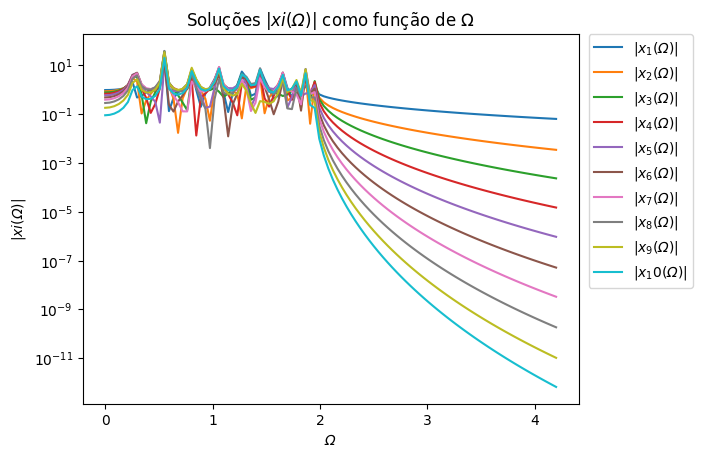

Valores de omega para os quais há máximos locais na curva selecionada:
[0.25454545 0.55151515 0.80606061 1.06060606 1.27272727 1.44242424
 1.65454545 1.78181818 1.86666667 1.95151515]


In [9]:
N = 10
F_tilde = 1
l = 1
m = 1
sigma = 0.1  # largura da distribuição gaussiana
mu = 1  # valor médio

k_values = np.random.normal(loc=mu, scale=sigma, size=N+1)

def solve_system(N, F_tilde, l, m, Omega, n):
    A = np.zeros((N, N))  # matriz A
    b = np.zeros_like(A[0])
    b[l-1] = F_tilde
    for i in range(N):
        A[i, i] = k_values[i] + k_values[i+1] - m * Omega**2 
        if i > 0:
            A[i, i-1] = -k_values[i]  
        if i < N-1:
            A[i, i+1] = -k_values[i+1]  
    if n == 0:
        return np.linalg.solve(A, b)
    else:
        return QR_eigvals(A,0)
omega = np.linspace(0, 4.2, 100)

x = np.zeros((N, len(omega)))

for i, Omega in enumerate(omega):
    x[:, i] = solve_system(N, F_tilde, l, m, Omega, 0)

# Plotando as soluções |xi(Ω)| como função de Ω em escala logarítmica
for i in range(N):
    plt.semilogy(omega, np.abs(x[i, :]), label=f'$|x_{i+1}(Ω)|$')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('$Ω$')
plt.ylabel('$|xi(Ω)|$')
plt.title('Soluções $|xi(Ω)|$ como função de Ω')
plt.show()

curve_index = 0
curve = np.abs(x[curve_index, :])
max_indices = argrelextrema(curve, np.greater)
max_omega_values = omega[max_indices]
print("Valores de omega para os quais há máximos locais na curva selecionada:")
print(max_omega_values)

2. Identifique na alínea anterior a posição dos valores próprios do sistema.

Os valores próprios do sistema deverão encontrar-se nos pontos $\omega$ para os quais ocorrem os máximos de amplitude para as componentes do sistema, já que os valores próprios do sistema do sistema livre dizem respeito às frequências naturais de oscilação do sistema. Os valores onde ocorrem os máximos estão próximos dos valores próprios para frequências baixas que deverão ocorrer devido à ocorrência do fenómeno de ressonância. Quanto aos outros de menores amplitudes poderão se dever a vários fatores ligados às especificidades do sistema. Para frequências altas o sistema decai para o equilíbrio daí que não possamos discernir os outros valores próprios.

In [13]:
N = 10
F = 1
l = 1
omega = np.linspace(0, 1, 100)
m = 1

x = np.zeros((N, len(omega)))
# matriz para armazenar as soluções para cada valor de omega

for i, Omega in enumerate(omega):
    x[:, i] = solve_system(N, F, l, m, Omega, 0)
# Calcular os autovalores
autovalores = solve_system(N, F, l, m, omega[0], 1)
    
for i, autovalor in enumerate(autovalores):
    print(f"Autovalor {i+1}: {autovalor}")

Autovalor 1: 3.772487342287359
Autovalor 2: 3.493358086080254
Autovalor 3: 3.1333580040074156
Autovalor 4: 2.7054110821304604
Autovalor 5: 2.1090517413846572
Autovalor 6: 1.6635675265698977
Autovalor 7: 1.1052957998409225
Autovalor 8: 0.6669234292721719
Autovalor 9: 0.3016785147678601
Autovalor 10: 0.07722631011954897


3.  Escolha algumas das frequências onde existem os picos e as respectivas soluções $x_{i}$. Para cada uma das soluções escolhidas, normalize-a e transforme as suas coordenadas calculando,
\begin{equation}
f_{\beta}=U_{\beta i}^{T}x_{i}.
\end{equation}
Represente cada um dos $\left|f_{\beta}\right|$ que obteve. Que conclusões pode tirar?

A magnitude dos valores $|f_{\beta}|$ diz-nos a amplitude ou intensidade do modo ou vibração associado ao respectivo autovalor e autovetor do sistema. Cada modo de vibração no sistema é caracterizado por um autovalor e um autovetor específicos. O autovalor determina a frequência do modo, enquanto o autovetor descreve o formato ou padrão da vibração entre as massas. A magnitude de $|f_{\beta}|$ fornece informações sobre a força ou intensidade desse modo particular. Tal como esperado denotamos que os modos normais de menor frequência dominam. 

[2.432481654471387, 2.323299048720139, 2.247345980876257, 2.379540362293353, 2.0199775244970564, 2.2563668172105062, 2.3525987465044733, 2.1530359599392597, 2.1950967444414418, 1.92500614690172]


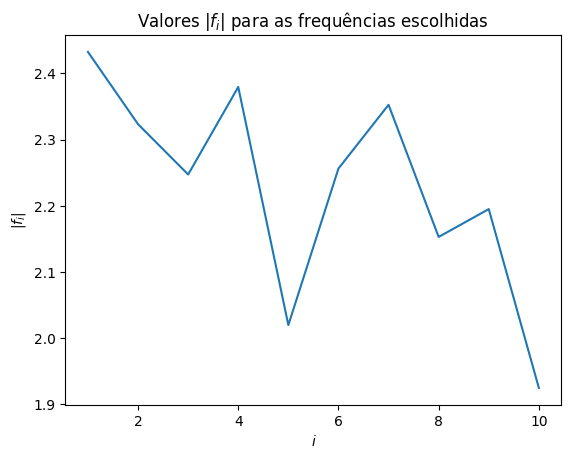

In [14]:
N = 10
F_tilde = 1
l = 1
m = 1
A_0 = np.zeros((N, N))    
for i in range(N):
    A_0[i, i] = k_values[i] + k_values[i+1] 
    if i > 0:
        A_0[i, i-1] = -k_values[i]  
    if i < N-1:
        A_0[i, i+1] = -k_values[i+1] 
def solve_system_f(N, F_tilde, l, m, Omega):

    A = np.zeros((N, N))  # matriz A
    b = np.zeros_like(A[0])
    b[l-1] = F_tilde
    for i in range(N):
        A[i, i] = k_values[i] + k_values[i+1] - m*Omega**2 
        if i > 0:
            A[i, i-1] = -k_values[i]  
        if i < N-1:
            A[i, i+1] = -k_values[i+1]  
    X = np.linalg.solve(A,b)
    X_norm = X/np.max(np.abs(X))
    return np.dot(QR_eigvals(A_0,1).transpose(),X_norm)
chosen_omega = max_omega_values
f_beta_values = []
for omega in chosen_omega:
    x_omega = solve_system_f(N, F_tilde, l, m, omega)
    f_beta_values.append(np.linalg.norm(x_omega))
print(f_beta_values)
plt.plot(range(1,len(chosen_omega)+1),f_beta_values)
plt.xlabel('$i$')
plt.ylabel('$|f_i|$')
plt.title('Valores $|f_i|$ para as frequências escolhidas')
plt.show()

4. Repita o procedimento anterior adicionando uma outra força para $i=10$ mas com amplitude $\tilde{F}=-1$ na equação da transformada de Fourier (mantemos a força em $l=1$). O que observa? 

Notamos ainda a predominância das amplitudes dos modos normais de menor frequência. Apenas denotamos diferenças nas amplitudes dos vários modos devido à alteração do vetor de forças aplicadas sob o conjunto de massas.

[2.093755315781269, 2.3194845203534338, 2.2311915570655567, 2.3862563634682035, 2.18472398023004, 2.1614163466578704, 1.8733978501197106, 2.2380281575945484, 2.097173718256362, 2.0727760899091012]


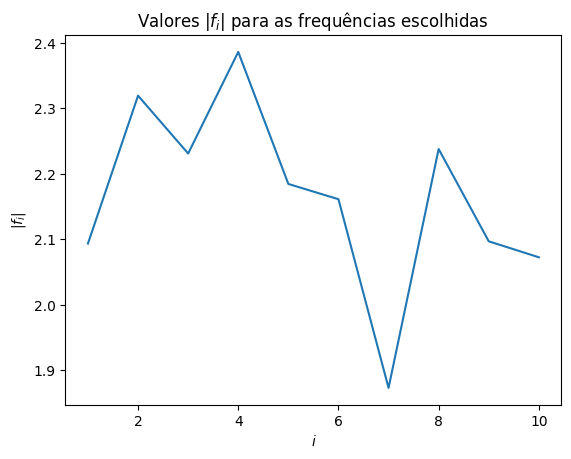

In [15]:
N = 10
F_tilde = 1
F_tilde_2 = -1
l = 1
l2 = 10
m = 1
A_0 = np.zeros((N, N))    
for i in range(N):
    A_0[i, i] = k_values[i] + k_values[i+1] 
    if i > 0:
        A_0[i, i-1] = -k_values[i]  
    if i < N-1:
        A_0[i, i+1] = -k_values[i+1] 
def solve_system_f2(N, F_tilde,F_tilde_2, l,l2, m, Omega):
    A = np.zeros((N,N))
    b = np.zeros_like(A[0])
    b[l-1] = F_tilde
    b[l2-1]= F_tilde_2 
    for i in range(N):
        A[i, i] = k_values[i] + k_values[i+1] - m*Omega**2 
        if i > 0:
            A[i, i-1] = -k_values[i]  
        if i < N-1:
            A[i, i+1] = -k_values[i+1] 
    X = np.linalg.solve(A,b)
    X_norm = X/np.max(np.abs(X))
    return np.dot(QR_eigvals(A_0,1).transpose(),X_norm)
chosen_omega = max_omega_values
f_beta_values = []
for omega in chosen_omega:
    x_omega = solve_system_f2(N, F_tilde,F_tilde_2, l,l2, m, omega)
    f_beta_values.append(np.linalg.norm(x_omega))
print(f_beta_values)
plt.plot(range(1,len(chosen_omega)+1),f_beta_values)
plt.xlabel('$i$')
plt.ylabel('$|f_i|$')
plt.title('Valores $|f_i|$ para as frequências escolhidas')
plt.show()

<div style="border:1px solid black;">
<br><div style="color:red; font-weight:bold;">Comentário:</div>

Tal como no problema anterior, o meu colega mostra compreender os métodos numéricos associados à obtenção da solução. Percebe também que este problema se foca no estudo das frequências de ressonância do sistema. Contudo revela algumas falhas quanto à interpretação do enunciado e à análise dos resultados, nomeadamente:

- Na questão 2.2 percebe que os autovelores $\lambda$ estão relacionados com as frequências de ressonância mas não identifica $\sqrt{\lambda}$ como as frequências de modo normal do sistema (e como o sistema não tem amortecimento estas são iguais às frequências de ressonância). Isto pode estar relacionado com a falha na questão 1.4 acima. Nota: Se definisse $A$ com o sinal oposto, as frequências de modo normal seriam $\sqrt{-\lambda}$.

- Na questão 2.3:

    - Descreve corretamente o significado do autovalor e autovetor do sistema mas não identifica $f_\beta$ explicitamente como as coordenadas de modo normal do sistema.

    - Calcula $f_\beta$ de forma errada, criando um vetor `f_beta_values` onde na $i$-ésima entrada guarda o valor de $\|f_\beta\|$ associado à $i$-ésima frequência de modo normal. O que deveria ter feito era determinar $f_\beta$ para um dado $\omega$ e depois representar graficamente $|f_\beta|$ em função de $\beta$. Se o fizesse para $f_\beta$ normalizado e escolhendo $\omega$ como uma das frequências de ressonância do sistema iria notar que uma das coordenadas de modo normal seria igual a $1$ enquanto as outras seriam iguais a $0$.

- Na questão 2.4 teria sido interessante repetir a representação gráfica da questão 2.1 de modo a confirmar que as frequências de ressonância se mantinham iguais.

</div>


Bom Trabalho